In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0][0]+(x[1][0]*1j)], [x[0][0]+(x[1][0]*1j), 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[0][1]+(x[1][1]*1j)], [x[0][1]+(x[1][1]*1j), 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, x[0][2]+(x[1][2]*1j)], [x[0][2]+(x[1][2]*1j), 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    P = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

def foS(x, alpha, d, D, H, i, psi0):
     
    z = np.zeros((2,3), dtype=np.complex_)
        
    z[0][0] = x[0][0] + alpha * d[0]
    z[1][0] = x[1][0] + alpha * d[1]
    
    z[0][1] = x[0][1] + alpha * d[0]
    z[1][1] = x[1][1] + alpha * d[1]
    
    z[0][2] = x[0][2] + alpha * d[0]
    z[1][2] = x[1][2] + alpha * d[1]
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0][0]+(z[1][0]*1j)], [z[0][0]+(z[1][0]*1j), 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, z[0][1]+(z[1][1]*1j)], [z[0][1]+(z[1][1]*1j), 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, z[0][2]+(z[1][2]*1j)], [z[0][2]+(z[1][2]*1j), 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    P = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.0000000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x[0][0] = x[0][0] + alpha * d[0]
        x[1][0] = x[1][0] + alpha * d[1]

        x[0][1] = x[0][1] + alpha * d[0]
        x[1][1] = x[1][1] + alpha * d[1]

        x[0][2] = x[0][2] + alpha * d[0]
        x[1][2] = x[1][2] + alpha * d[1]
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = np.zeros((2,3), dtype=np.complex_)
x[0][0] = random.uniform(-5., 5.)
x[1][0] = random.uniform(-5., 5.)
x[0][1] = x[0][0]
x[1][1] = x[1][0]
x[0][2] = x[0][0]
x[1][2] = x[1][0]

i = 0

psi0 = [[complex(1.0,0.0)],[complex(0.0,0.0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    print(resultado[1][0])
    
    x = np.zeros((2,3), dtype=np.complex_)
    u = np.zeros((2,2), dtype=np.complex_)
    x[0][0] = resultado[1][0][0]
    x[1][0] = resultado[1][0][0]
    x[0][1] = x[0][0]
    x[1][1] = x[1][0]
    x[0][2] = x[0][0]
    x[1][2] = x[1][0]
    
    u = [[0, resultado[1][0][0]],[resultado[1][0][0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[1.93106112+0.j 1.93106112+0.j 1.93106112+0.j]
[[(0.9996902574309328-0.015702436058149513j)], [(-0.0006064982979705635-0.019299087483338005j)]]
iteracao:  2
[1.52392689+0.j 1.52392689+0.j 1.52392689+0.j]
[[(0.9989106511553799-0.03137961475161496j)], [(-0.0022324309557960847-0.034465155038117964j)]]
iteracao:  3
[0.93857515+0.j 0.93857515+0.j 0.93857515+0.j]
[[(0.9979279374865114-0.04703231482102378j)], [(-0.004442165313424442-0.04368134581518842j)]]
iteracao:  4
[0.26692728+0.j 0.26692728+0.j 0.26692728+0.j]
[[(0.996946362155811-0.06268550950106676j)], [(-0.006704026941953944-0.04608181596380369j)]]
iteracao:  5
[-0.41402184+0.j -0.41402184+0.j -0.41402184+0.j]
[[(0.9960200373135255-0.07837010201040427j)], [(-0.008478226653209239-0.04159725840943206j)]]
iteracao:  6
[-1.04574552+0.j -1.04574552+0.j -1.04574552+0.j]
[[(0.9950438242605102-0.09410180163999184j)], [(-0.009281518649789459-0.030765109691950412j)]]
iteracao:  7
[-1.58820607+0.j -1.58820607+0.j -1.58820607+0.j]
[[

[-2.63233888+0.j -2.63233888+0.j -2.63233888+0.j]
[[(0.531168500074633-0.2612332658536878j)], [(0.8051815586739178+0.0360535176058766j)]]
iteracao:  55
[-2.63233888+0.j -2.63233888+0.j -2.63233888+0.j]
[[(0.5265353330184621-0.2482378499478549j)], [(0.8130180452047341+0.011839094376598289j)]]
iteracao:  56
[-2.63233889+0.j -2.63233889+0.j -2.63233889+0.j]
[[(0.5227518171092433-0.23498967456575848j)], [(0.8193570800100445-0.012820252298752818j)]]
iteracao:  57
[-2.63233889+0.j -2.63233889+0.j -2.63233889+0.j]
[[(0.5198319874898242-0.22154195665434365j)], [(0.8241739440022227-0.037830793732590816j)]]
iteracao:  58
[-2.6323389+0.j -2.6323389+0.j -2.6323389+0.j]
[[(0.5177865512103239-0.207948681273816j)], [(0.8274497796705629-0.06309744840446742j)]]
iteracao:  59
[-2.6323389+0.j -2.6323389+0.j -2.6323389+0.j]
[[(0.516622845991045-0.19426439367703546j)], [(0.8291716637097464-0.08852414815959322j)]]
iteracao:  60
[-2.63233891+0.j -2.63233891+0.j -2.63233891+0.j]
[[(0.5163448119620995-0.180543

[-6.46842897+0.j -6.46842897+0.j -6.46842897+0.j]
[[(0.9105620583206656-0.031741467584664486j)], [(0.21634734566128128+0.35080334245091266j)]]
iteracao:  108
[-6.46842896+0.j -6.46842896+0.j -6.46842896+0.j]
[[(0.8858250727964405-0.03123454796832833j)], [(0.23605258622907557+0.3982680740860861j)]]
iteracao:  109
[-6.46842894+0.j -6.46842894+0.j -6.46842894+0.j]
[[(0.8581243540457584-0.028972137784996632j)], [(0.25784405388244097+0.44305709338948274j)]]
iteracao:  110
[-6.46842893+0.j -6.46842893+0.j -6.46842893+0.j]
[[(0.8276710403330663-0.024782386114828504j)], [(0.2814698046513048+0.48489294108886877j)]]
iteracao:  111
[-6.46842891+0.j -6.46842891+0.j -6.46842891+0.j]
[[(0.7946959060185164-0.01851396741118386j)], [(0.30665497824146104+0.5235248840503459j)]]
iteracao:  112
[-6.46842889+0.j -6.46842889+0.j -6.46842889+0.j]
[[(0.7594472236528141-0.010037769652868081j)], [(0.3331044941907122+0.5587311344150611j)]]
iteracao:  113
[-6.46842887+0.j -6.46842887+0.j -6.46842887+0.j]
[[(0.7221

[1.08597338+0.j 1.08597338+0.j 1.08597338+0.j]
[[(0.18210150228213723-0.7437461229905507j)], [(-0.20796971570499956-0.6086284314671859j)]]
iteracao:  162
[1.08597334+0.j 1.08597334+0.j 1.08597334+0.j]
[[(0.16385225244578075-0.7440057320910732j)], [(-0.24453011855450174-0.5998434410643715j)]]
iteracao:  163
[1.0859733+0.j 1.0859733+0.j 1.0859733+0.j]
[[(0.1457100727770702-0.7435848557089138j)], [(-0.2806305624937394-0.589148408278338j)]]
iteracao:  164
[1.08597326+0.j 1.08597326+0.j 1.08597326+0.j]
[[(0.12770620546056638-0.7424909433150576j)], [(-0.3161742647820467-0.5765686263134263j)]]
iteracao:  165
[1.08597322+0.j 1.08597322+0.j 1.08597322+0.j]
[[(0.10987146244571036-0.7407329755284817j)], [(-0.35106583875325953-0.5621342542394256j)]]
iteracao:  166
[1.08597318+0.j 1.08597318+0.j 1.08597318+0.j]
[[(0.09223614914103016-0.7383214402672911j)], [(-0.3852115378586005-0.5458802403500271j)]]
iteracao:  167
[1.08597314+0.j 1.08597314+0.j 1.08597314+0.j]
[[(0.07482998941193209-0.735268305083

[1.08597275+0.j 1.08597275+0.j 1.08597275+0.j]
[[(-0.1912447780761622-0.29987277709922716j)], [(-0.1400742503559244+0.9240563680624877j)]]
iteracao:  216
[1.08597277+0.j 1.08597277+0.j 1.08597277+0.j]
[[(-0.18584242913875867-0.29560932225698094j)], [(-0.09957297944516458+0.9317521968280207j)]]
iteracao:  217
[1.42116819+0.j 1.42116819+0.j 1.42116819+0.j]
[[(-0.17716450284376126-0.29162602560114165j)], [(-0.05968006882797259+0.9380855524593621j)]]
iteracao:  218
[1.59227969+0.j 1.59227969+0.j 1.59227969+0.j]
[[(-0.1667417156534616-0.28829031925513643j)], [(-0.01997295842818035+0.9427015365664853j)]]
iteracao:  219
[1.76564701+0.j 1.76564701+0.j 1.76564701+0.j]
[[(-0.15457616125415577-0.28576178086280046j)], [(0.01945952413555979+0.9455511385976657j)]]
iteracao:  220
[1.88213747+0.j 1.88213747+0.j 1.88213747+0.j]
[[(-0.14124244528420937-0.28417365802236927j)], [(0.05868603392563035+0.946494092290331j)]]
iteracao:  221
[1.97368395+0.j 1.97368395+0.j 1.97368395+0.j]
[[(-0.12702645456260256

[-3.01181238+0.j -3.01181238+0.j -3.01181238+0.j]
[[(0.04466667930828262-0.2560159917833608j)], [(0.8038752950429503-0.535018135835396j)]]
iteracao:  270
[-3.0118124+0.j -3.0118124+0.j -3.0118124+0.j]
[[(0.057485673187934905-0.2328808420023814j)], [(0.7851723481930447-0.5709338751456958j)]]
iteracao:  271
[-3.01181243+0.j -3.01181243+0.j -3.01181243+0.j]
[[(0.0717236733717563-0.21055711657331022j)], [(0.7641231896702094-0.6055050463069146j)]]
iteracao:  272
[-3.01181245+0.j -3.01181245+0.j -3.01181245+0.j]
[[(0.08732443858173759-0.1891359627480641j)], [(0.740820566823287-0.6385813275980899j)]]
iteracao:  273
[-3.01181247+0.j -3.01181247+0.j -3.01181247+0.j]
[[(0.10422589279950373-0.1687046588399997j)], [(0.715366850736692-0.6700187786872175j)]]
iteracao:  274
[-3.01181249+0.j -3.01181249+0.j -3.01181249+0.j]
[[(0.12236039052210373-0.1493462412620455j)], [(0.687873598722948-0.699680455786629j)]]
iteracao:  275
[-3.01181252+0.j -3.01181252+0.j -3.01181252+0.j]
[[(0.14165500581943327-0.13

[-9.5856451+0.j -9.5856451+0.j -9.5856451+0.j]
[[(0.3407891271786718-0.5298814831997605j)], [(0.4544699118106772+0.6297167406698395j)]]
iteracao:  323
[-7.63130979+0.j -7.63130979+0.j -7.63130979+0.j]
[[(0.2845779708527543-0.4974636649881791j)], [(0.5234322220131831+0.6305249103873102j)]]
iteracao:  324
[-5.63135183+0.j -5.63135183+0.j -5.63135183+0.j]
[[(0.24175477005878923-0.4705125150356192j)], [(0.5801743706731215+0.6193286461524661j)]]
iteracao:  325
[-3.72927526+0.j -3.72927526+0.j -3.72927526+0.j]
[[(0.21177565129463247-0.45157536642713025j)], [(0.6261021550458061+0.5993534182738617j)]]
iteracao:  326
[-2.06564308+0.j -2.06564308+0.j -2.06564308+0.j]
[[(0.19264703451026058-0.4414345599998812j)], [(0.6629620278460668+0.5731506478962993j)]]
iteracao:  327
[-0.76120248+0.j -0.76120248+0.j -0.76120248+0.j]
[[(0.1814823144493377-0.43921236921950085j)], [(0.6926097881420504+0.5426287973408378j)]]
iteracao:  328
[0.10298134+0.j 0.10298134+0.j 0.10298134+0.j]
[[(0.17509709175795146-0.44

[-1.19017036+0.j -1.19017036+0.j -1.19017036+0.j]
[[(0.7284309304582915+0.4627620678827213j)], [(-0.12976664093012158-0.4882600341117985j)]]
iteracao:  376
[-1.01269404+0.j -1.01269404+0.j -1.01269404+0.j]
[[(0.7404724338674671+0.4497718219028295j)], [(-0.15706729475827264-0.47406048311122223j)]]
iteracao:  377
[-0.8400189+0.j -0.8400189+0.j -0.8400189+0.j]
[[(0.7513578425857574+0.43662656913068115j)], [(-0.1827988216349295-0.4597834447462767j)]]
iteracao:  378
[-0.67196122+0.j -0.67196122+0.j -0.67196122+0.j]
[[(0.7611554770561+0.4234367656052234j)], [(-0.20702394351854644-0.4455135528343372j)]]
iteracao:  379
[-0.50815218+0.j -0.50815218+0.j -0.50815218+0.j]
[[(0.7699322884162838+0.41030107209560773j)], [(-0.2298068582710974-0.4313278370217255j)]]
iteracao:  380
[-0.34809357+0.j -0.34809357+0.j -0.34809357+0.j]
[[(0.7777527980048784+0.3973078482853198j)], [(-0.2512118648757365-0.41729755737087093j)]]
iteracao:  381
[-0.19121031+0.j -0.19121031+0.j -0.19121031+0.j]
[[(0.78467845034612

[10.56290734+0.j 10.56290734+0.j 10.56290734+0.j]
[[(0.2745184898550804+0.6851446585398097j)], [(-0.24145842000891105-0.6300093749768579j)]]
iteracao:  430
[11.19377742+0.j 11.19377742+0.j 11.19377742+0.j]
[[(0.21392689644264434+0.7056746791269058j)], [(-0.19368386166296447-0.6471032941611832j)]]
iteracao:  431
[11.87417192+0.j 11.87417192+0.j 11.87417192+0.j]
[[(0.1474528610883419+0.7226394979408183j)], [(-0.13966617813273396-0.6607122998273426j)]]
iteracao:  432
[12.6063811+0.j 12.6063811+0.j 12.6063811+0.j]
[[(0.0749901763705919+0.7346925655598392j)], [(-0.0791085803770527-0.6695839783617987j)]]
iteracao:  433
[13.39172468+0.j 13.39172468+0.j 13.39172468+0.j]
[[(-0.0033438046926967807+0.7402307015056725j)], [(-0.011907775428480288-0.6722373683292748j)]]
iteracao:  434
[14.22998588+0.j 14.22998588+0.j 14.22998588+0.j]
[[(-0.08711103742705618+0.7373941942396229j)], [(0.06174627640274334-0.6669680552465309j)]]
iteracao:  435
[15.11865736+0.j 15.11865736+0.j 15.11865736+0.j]
[[(-0.17543

[19.12831052+0.j 19.12831052+0.j 19.12831052+0.j]
[[(-0.1383009947972924+0.7163143986844492j)], [(0.14705150229938188-0.6679303951749916j)]]
iteracao:  483
[19.59265727+0.j 19.59265727+0.j 19.59265727+0.j]
[[(-0.25560472229994513+0.6801018246963386j)], [(0.2533005957213693-0.6387134734281382j)]]
iteracao:  484
[19.99672964+0.j 19.99672964+0.j 19.99672964+0.j]
[[(-0.36853776348936085+0.624049495145601j)], [(0.3549697640426742-0.590530816579137j)]]
iteracao:  485
[20.33810589+0.j 20.33810589+0.j 20.33810589+0.j]
[[(-0.47289760284931054+0.548792946780554j)], [(0.4482095464459111-0.5237270564301052j)]]
iteracao:  486
[20.61637111+0.j 20.61637111+0.j 20.61637111+0.j]
[[(-0.5645466777609246+0.45593971572554576j)], [(0.5292839312766513-0.4396041517438576j)]]
iteracao:  487
[20.83256363+0.j 20.83256363+0.j 20.83256363+0.j]
[[(-0.6396804441264534+0.34802470631934723j)], [(0.5948154601810414-0.3403955557383833j)]]
iteracao:  488
[20.98856545+0.j 20.98856545+0.j 20.98856545+0.j]
[[(-0.69507688903

[21.24858072+0.j 21.24858072+0.j 21.24858072+0.j]
[[(0.21039607990791112-0.7059784122841364j)], [(-0.1803642740743591+0.6517340583331829j)]]
iteracao:  536
[20.4542226+0.j 20.4542226+0.j 20.4542226+0.j]
[[(0.3287404841028524-0.661912374444866j)], [(-0.2908662248165345+0.6075843517601662j)]]
iteracao:  537
[19.66837739+0.j 19.66837739+0.j 19.66837739+0.j]
[[(0.4327554327317796-0.6009910677052299j)], [(-0.3880452090402816+0.5485556504507112j)]]
iteracao:  538
[18.92242227+0.j 18.92242227+0.j 18.92242227+0.j]
[[(0.5212398145463615-0.5270788555599469j)], [(-0.47075164037398626+0.47838219395079673j)]]
iteracao:  539
[18.24297299+0.j 18.24297299+0.j 18.24297299+0.j]
[[(0.5939026680622829-0.4435999554063048j)], [(-0.5387199219128619+0.4002987285276298j)]]
iteracao:  540
[17.65138932+0.j 17.65138932+0.j 17.65138932+0.j]
[[(0.65104269951761-0.35340236542248127j)], [(-0.5922576593778079+0.3169233807397552j)]]
iteracao:  541
[17.16379325+0.j 17.16379325+0.j 17.16379325+0.j]
[[(0.6932621558396668-

[16.488494+0.j 16.488494+0.j 16.488494+0.j]
[[(0.5467746659145354+0.5026683920852624j)], [(-0.48100374887758857-0.46577056961725793j)]]
iteracao:  589
[16.81276164+0.j 16.81276164+0.j 16.81276164+0.j]
[[(0.47134005060817524+0.5700290968356094j)], [(-0.4141965135874295-0.5303691334060583j)]]
iteracao:  590
[17.17235169+0.j 17.17235169+0.j 17.17235169+0.j]
[[(0.38472803050026455+0.6279424997257181j)], [(-0.33752187464392774-0.5862561033018411j)]]
iteracao:  591
[17.56356433+0.j 17.56356433+0.j 17.56356433+0.j]
[[(0.2878430990511741+0.6744823945978372j)], [(-0.2516917025418645-0.631518553179709j)]]
iteracao:  592
[17.9832086+0.j 17.9832086+0.j 17.9832086+0.j]
[[(0.18199580971859114+0.7076689276775758j)], [(-0.15777275746242572-0.6641794675534809j)]]
iteracao:  593
[18.42849975+0.j 18.42849975+0.j 18.42849975+0.j]
[[(0.06896184050805416+0.7255435008074405j)], [(-0.05724437121241002-0.6822742758071394j)]]
iteracao:  594
[18.89685217+0.j 18.89685217+0.j 18.89685217+0.j]
[[(-0.048971000375965

[24.51396239+0.j 24.51396239+0.j 24.51396239+0.j]
[[(-0.5922373076648446-0.4239280820653558j)], [(0.5628640997968885+0.3906916262968696j)]]
iteracao:  642
[24.1443578+0.j 24.1443578+0.j 24.1443578+0.j]
[[(-0.4921915394356048-0.5401743544317419j)], [(0.4670531731195151+0.4977301224310123j)]]
iteracao:  643
[23.65390051+0.j 23.65390051+0.j 23.65390051+0.j]
[[(-0.3733858133317189-0.6307521227709811j)], [(0.3535848722239731+0.5810561703700406j)]]
iteracao:  644
[23.06670159+0.j 23.06670159+0.j 23.06670159+0.j]
[[(-0.24269093849351026-0.6933357726286467j)], [(0.22919443558063884+0.6385682325029337j)]]
iteracao:  645
[22.41052676+0.j 22.41052676+0.j 22.41052676+0.j]
[[(-0.10679671498069607-0.727629862331522j)], [(0.10040311647976552+0.6700601477200075j)]]
iteracao:  646
[21.71490981+0.j 21.71490981+0.j 21.71490981+0.j]
[[(0.028345824634806893-0.7350007471770506j)], [(-0.027034713329259163+0.6768686018706606j)]]
iteracao:  647
[21.00932186+0.j 21.00932186+0.j 21.00932186+0.j]
[[(0.15785948690

[15.27846361+0.j 15.27846361+0.j 15.27846361+0.j]
[[(0.7496399214987022-0.00617860633494885j)], [(-0.6617383050143132+0.0011293703539787259j)]]
iteracao:  695
[15.13813393+0.j 15.13813393+0.j 15.13813393+0.j]
[[(0.7441869756627887+0.08207615152946628j)], [(-0.6578704770101231-0.08094868668412125j)]]
iteracao:  696
[15.07833037+0.j 15.07833037+0.j 15.07833037+0.j]
[[(0.7278702722705793+0.16881630448117851j)], [(-0.6446494185680367-0.16133818887482565j)]]
iteracao:  697
[15.10000954+0.j 15.10000954+0.j 15.10000954+0.j]
[[(0.7008918501967278+0.2533420678727964j)], [(-0.6221944643783109-0.23945642432790948j)]]
iteracao:  698
[15.20288007+0.j 15.20288007+0.j 15.20288007+0.j]
[[(0.6633419302748806+0.33490830451914294j)], [(-0.5904984582610754-0.31467818019729116j)]]
iteracao:  699
[15.30262658+0.j 15.30262658+0.j 15.30262658+0.j]
[[(0.6155560163794185+0.4122062086176363j)], [(-0.5497892646628583-0.3857530624997849j)]]
iteracao:  700
[15.30262658+0.j 15.30262658+0.j 15.30262658+0.j]
[[(0.5585

[7.44880468+0.j 7.44880468+0.j 7.44880468+0.j]
[[(0.7726890575325093-0.1152003222712718j)], [(-0.6103152340636971+0.13071369450921794j)]]
iteracao:  748
[7.55847846+0.j 7.55847846+0.j 7.55847846+0.j]
[[(0.7799003513149257-0.08118447260915546j)], [(-0.6122797228335566+0.1008380534627957j)]]
iteracao:  749
[7.69254781+0.j 7.69254781+0.j 7.69254781+0.j]
[[(0.7854528275363026-0.046339314942443276j)], [(-0.6131695803516659+0.06949703412992005j)]]
iteracao:  750
[7.85753341+0.j 7.85753341+0.j 7.85753341+0.j]
[[(0.789173191224055-0.010531224219364345j)], [(-0.612904351106445+0.036513999558254656j)]]
iteracao:  751
[8.0607677+0.j 8.0607677+0.j 8.0607677+0.j]
[[(0.7908384288267668+0.026408120007984176j)], [(-0.6113629447103617+0.001669864882177144j)]]
iteracao:  752
[8.30901794+0.j 8.30901794+0.j 8.30901794+0.j]
[[(0.7901581200902532+0.06467160305516884j)], [(-0.6083690883610665-0.035284967103380624j)]]
iteracao:  753
[8.5991111+0.j 8.5991111+0.j 8.5991111+0.j]
[[(0.7867639863573407+0.104407050

[9.81863791+0.j 9.81863791+0.j 9.81863791+0.j]
[[(0.6601494561713411-0.3497770421559106j)], [(-0.6000369648230657+0.2858145380441042j)]]
iteracao:  801
[9.26828072+0.j 9.26828072+0.j 9.26828072+0.j]
[[(0.6799632732161001-0.303855248407775j)], [(-0.6176521864782608+0.2523951341688551j)]]
iteracao:  802
[8.87910275+0.j 8.87910275+0.j 8.87910275+0.j]
[[(0.6965496737577619-0.2591938275746879j)], [(-0.6315056955760737+0.22071080553921543j)]]
iteracao:  803
[8.64718639+0.j 8.64718639+0.j 8.64718639+0.j]
[[(0.710580614861593-0.2151550009009892j)], [(-0.642342658608201+0.18988158226889668j)]]
iteracao:  804
[8.56715284+0.j 8.56715284+0.j 8.56715284+0.j]
[[(0.722494195425245-0.17100928776255983j)], [(-0.6506663035079543+0.15895569528888093j)]]
iteracao:  805
[8.63219516+0.j 8.63219516+0.j 8.63219516+0.j]
[[(0.7325054556226414-0.12599310143116169j)], [(-0.6567489524639495+0.12695628901293096j)]]
iteracao:  806
[8.83395054+0.j 8.83395054+0.j 8.83395054+0.j]
[[(0.7406082552566039-0.079358715967877

[17.5458886+0.j 17.5458886+0.j 17.5458886+0.j]
[[(0.7443905071506453+0.051431351597866354j)], [(-0.6574549346506641-0.10420052143008357j)]]
iteracao:  854
[16.70970341+0.j 16.70970341+0.j 16.70970341+0.j]
[[(0.7208368123630828+0.1491217614734014j)], [(-0.647768768713858-0.19600936824072313j)]]
iteracao:  855
[16.04431305+0.j 16.04431305+0.j 16.04431305+0.j]
[[(0.6857391444365153+0.24052145891153165j)], [(-0.6276836832578545-0.27891116822112005j)]]
iteracao:  856
[15.56640891+0.j 15.56640891+0.j 15.56640891+0.j]
[[(0.6409065268272855+0.3256502146992286j)], [(-0.598487337520487-0.3533703533405411j)]]
iteracao:  857
[15.28753708+0.j 15.28753708+0.j 15.28753708+0.j]
[[(0.5874512694445244+0.4047214983797758j)], [(-0.560844645890558-0.4200258192072762j)]]
iteracao:  858
[15.21595825+0.j 15.21595825+0.j 15.21595825+0.j]
[[(0.5258682751421981+0.47791055874827726j)], [(-0.5148393659623437-0.47944898304018246j)]]
iteracao:  859
[15.35791348+0.j 15.35791348+0.j 15.35791348+0.j]
[[(0.4561445163701

[35.27142374+0.j 35.27142374+0.j 35.27142374+0.j]
[[(0.721559439242344+0.15475598271152524j)], [(-0.6697623322420669-0.08018914203441191j)]]
iteracao:  907
[35.66883614+0.j 35.66883614+0.j 35.66883614+0.j]
[[(0.6576100847248176+0.36945067453903974j)], [(-0.5843977786552549-0.2985419929701071j)]]
iteracao:  908
[35.64395192+0.j 35.64395192+0.j 35.64395192+0.j]
[[(0.5237030504112533+0.5440093187318659j)], [(-0.4387909882562035-0.4866497923052482j)]]
iteracao:  909
[35.21286635+0.j 35.21286635+0.j 35.21286635+0.j]
[[(0.3362021444333113+0.6597064963787294j)], [(-0.25139106811541034-0.6229923581313024j)]]
iteracao:  910
[34.47468976+0.j 34.47468976+0.j 34.47468976+0.j]
[[(0.11798562553592165+0.7075824518525168j)], [(-0.04508473196570395-0.6949260338814409j)]]
iteracao:  911
[33.56995596+0.j 33.56995596+0.j 33.56995596+0.j]
[[(-0.10685528950388354+0.6883672471927207j)], [(0.1579057345854342-0.6995252602917089j)]]
iteracao:  912
[32.64036031+0.j 32.64036031+0.j 32.64036031+0.j]
[[(-0.31709151

[16.34551243+0.j 16.34551243+0.j 16.34551243+0.j]
[[(0.576421978958466+0.4177330380057461j)], [(-0.5750722301269995-0.40233625642424886j)]]
iteracao:  960
[16.76749558+0.j 16.76749558+0.j 16.76749558+0.j]
[[(0.5105824944790052+0.5010141054486829j)], [(-0.5184635409432184-0.4677943654344195j)]]
iteracao:  961
[17.42819285+0.j 17.42819285+0.j 17.42819285+0.j]
[[(0.43221008136791733+0.5779494267327765j)], [(-0.44776704026703706-0.5272751556933546j)]]
iteracao:  962
[18.31762395+0.j 18.31762395+0.j 18.31762395+0.j]
[[(0.34032210412517744+0.6461481239859226j)], [(-0.3615527989965593-0.5790495419138205j)]]
iteracao:  963
[19.41734437+0.j 19.41734437+0.j 19.41734437+0.j]
[[(0.2342391804997788+0.7019872642234596j)], [(-0.2586918262784328-0.6202979057955471j)]]
iteracao:  964
[20.69609466+0.j 20.69609466+0.j 20.69609466+0.j]
[[(0.11412350635017715+0.7405096543694102j)], [(-0.13896385128816635-0.6470355282924111j)]]
iteracao:  965
[22.10462126+0.j 22.10462126+0.j 22.10462126+0.j]
[[(-0.018335112

/home/gabriel/miniconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


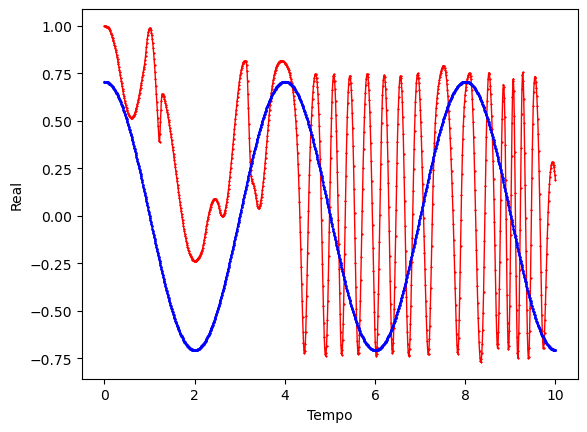

In [6]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_2.png', format='png')
plt.show()

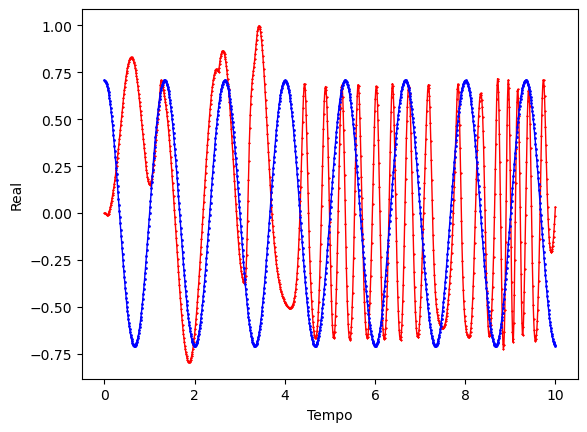

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_3.png', format='png')
plt.show()